<div style='line-height: 1.5; color: #00008B; font-size: 14px; font-family: Arial, sans-serif;'>
    
#  Análise de Risco de sinistros Residenciais com Machine Learning

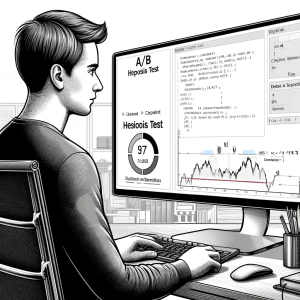 



**********************************************************************************
# 1. Introdução

<div style='line-height: 1.7; color: #00008B; font-size: 14px; font-family: Arial, sans-serif;'>
    
<p>
    
Neste projeto, abordamos a complexa questão dos sinistros residenciais através de técnicas de machine learning. O objetivo é desenvolver um modelo preditivo que possa identificar o risco de sinistros com base em uma série de características das propriedades seguradas. Esse modelo visa auxiliar as seguradoras na redução dos custos com sinistros, na melhoria da precisão da precificação das apólices de seguro e no aumento da satisfação do cliente ao oferecer prêmios mais justos.</p>


**********************************************************************************
# 2. Contexto

<div style='line-height: 1.7; color: #00008B; font-size: 14px; font-family: Arial, sans-serif;'>
<p> 
Os sinistros residenciais representam uma significativa preocupação para as seguradoras, impactando diretamente na sustentabilidade financeira e na satisfação do cliente. A previsão eficaz de sinistros pode ajudar as seguradoras a aprimorar suas estratégias de precificação e mitigação de riscos.
     Este projeto visa reduzir os custos com sinistros para a seguradora, melhorar a precisão da precificação das apólices de seguro e aumentar a satisfação do cliente ao oferecer prêmios mais justos.</p>


**********************************************************************************
# 3. Problema Proposto

<div style='line-height: 1.7; color: #00008B; font-size: 14px; font-family: Arial, sans-serif;'>
    
<p>
O desafio consiste em analisar um conjunto de dados de propriedades residenciais e seus históricos de sinistros para construir um modelo que preveja a probabilidade de ocorrência de um sinistro. O objetivo é usar essa previsão para reduzir os custos com sinistros, melhorar a precisão da precificação das apólices de seguro e aumentar a satisfação do cliente.</p>


**********************************************************************************
# 4. Metodologia

<div style='line-height: 1.2; color: #00008B; font-size: 14px; font-family: Arial, sans-serif;'>
    
<p>


| **Etapa**                         | **Descrição do Objetivo**                                                                                       |
|-----------------------------------|----------------------------------------------------------------------------------------------------------------|
| <span style="font-size: 14px;">Preparação dos Dados</span>          | <span style="font-size: 14px;">Limpeza e transformação de dados para garantir a qualidade e a adequação ao modelo de machine learning.</span>        |
| <span style="font-size: 14px;">Exploração de Dados</span>           | <span style="font-size: 14px;">Análise exploratória para entender as características e a distribuição das variáveis.</span>                          |
| <span style="font-size: 14px;">Modelagem Estatística</span>         | <span style="font-size: 14px;">Utilização de técnicas estatísticas para identificar correlações e padrões significativos.</span>                     |
| <span style="font-size: 14px;">Desenvolvimento de Modelo de ML</span> | <span style="font-size: 14px;">Treinamento de modelos de classificação, como Random Fting, para prever sinistros.</span>       |
| <span style="font-size: 14px;">Validação e Teste</span>             | <span style="font-size: 14px;">Avaliação do modelo através de métricas de desempenho, como acurácia, precisão, recall, F1-score e matriz de cnfusão, e validação cruzada para garantir a generalização.</span> |
| <span style="font-size: 14px;">Interpretação e Implementação</span> | <span style="font-size: 14px;">Discussão dos resultados, análise da importância das variáveis e planejamento para a implementação operacional do modelo, visando reduzir os custos com sinistros, melhorar a precisão da precificação das apólices de seguro e aumentar a satisfação do cliente.</span> |

**********************************************************************************
# 5. Importação de Bibliotecas


## Preparação do Ambiente de Análise


<div style='line-height: 1.5; color: #00008B; font-size: 14px; font-family: Arial, sans-serif;'>
    
<p>
    
Inicializa o ambiente de análise carregando todas as bibliotecas necessárias para manipulação de dados, análise estatística e visualização, garantindo que todas as ferramentas estejam disponíveis para as etapas subsequentes.

In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
import plotly.express as px
from IPython.display import display, Markdown, HTML
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Configurações estéticas dos gráficos do Seaborn e supressão de avisos
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

# Configurações adicionais de visualização
%matplotlib inline


**********************************************************************************
# 6. Carregamento de Dados

In [3]:
# Carregamento de dados
try:
    dados = pd.read_csv('dados_seguro_residenciais.csv', delimiter=';', encoding='utf-8')
    display(Markdown("<h3 style='color: darkred'>Dados carregados com sucesso!!</h3>"))
except FileNotFoundError:
    display(Markdown("<h3 style='color: darkred'>Não foi possível carregar o arquivo!!</h3>"))


<h3 style='color: darkred'>Dados carregados com sucesso!!</h3>

****************************
# 7.  Exploração Inicial dos Dados



## 7.1 Primeiras linhas do DataFrame para inspeção inicial


In [4]:
### Exibir as primeiras linhas e informações dos dados
display(dados.head())
display(dados.info())


,cidade_residencia,idade_proprietario,valor_imovel,tipo_construcao,historico_sinistro,valor_premio_seguro,sinistro,regiao,renda_anual,historico_credito,...,valor_seguro,numero_comodos,idade_imovel,material_construcao,seguranca,perfil_seg,risco_climatico,historico_reclamacoes,tamanho_imovel,area_m2
0,São Gonçalo,71,387671.21,Condomínio Fechado,0,3752.74,0,Sudeste,77826.00,782,...,1938.00,3,5,4,0,23681.90,3,0,5102.04,75.98
1,Caruaru,55,333997.09,Studio,0,1055.28,0,Nordeste,51997.00,732,...,1670.00,5,7,5,1,15908.40,2,0,10416.67,32.06
2,Manaus,62,375704.65,Sobrado,0,2567.33,0,Norte,65169.00,541,...,1879.00,10,17,6,1,19785.70,1,0,5494.51,68.38
3,Maringá,77,475643.69,Sobrado,0,5345.85,1,Sul,78940.00,576,...,2378.00,6,34,6,1,23935.50,4,0,5494.51,86.57
4,Contagem,72,199999.49,Cobertura,0,3269.24,0,Sudeste,62200.00,487,...,1000.00,5,22,7,1,18876.40,3,0,5555.56,36.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cidade_residencia      8000 non-null   object 
 1   idade_proprietario     8000 non-null   int64  
 2   valor_imovel           8000 non-null   float64
 3   tipo_construcao        8000 non-null   object 
 4   historico_sinistro     8000 non-null   int64  
 5   valor_premio_seguro    8000 non-null   float64
 6   sinistro               8000 non-null   int64  
 7   regiao                 8000 non-null   object 
 8   renda_anual            8000 non-null   float64
 9   historico_credito      8000 non-null   int64  
 10  numero_dependentes     8000 non-null   int64  
 11  ano_construcao         8000 non-null   int64  
 12  distancia_bombeiros    8000 non-null   float64
 13  sistema_alarme         8000 non-null   int64  
 14  cameras_seguranca      8000 non-null   int64  
 15  esta

None

**********************************************************************************
## 7.2 Apresenta Metadados de Cada Variável:

| Variável                 | Descrição                                                                                 | Tipo de Dados |
|--------------------------|-------------------------------------------------------------------------------------------|---------------|
| `cidade_residencia`      | Nome da cidade do imóvel segurado                                                         | `object`      |
| `idade_proprietario`     | Idade do proprietário do imóvel                                                           | `int64`       |
| `valor_imovel`           | Valor estimado do imóvel                                                                  | `float64`     |
| `tipo_construcao`        | Tipo de construção do imóvel (casa, apartamento, etc.)                                    | `object`      |
| `historico_sinistro`          | Indica se houve sinistros anteriores na propriedade (1 para sim, 0 para não)              | `int64`       |
| `valor_premio_seguro`    | Valor pago pelo segurado para obter a cobertura do seguro                                 | `float64`     |
| `sinistro`               | Indica se ocorreu um sinistro (0 para Não, 1 para Sim)                                    | `int64`       |
| `regiao`                 | Informa qual das regiões presentes no Brasil está o imóvel                                | `object`      |
| `renda_anual`            | Renda anual do proprietário                                                               | `float64`     |
| `historico_credito`      | Histórico de crédito do proprietário                                                      | `int64`       |
| `numero_dependentes`     | Número de dependentes do proprietário                                                     | `int64`       |
| `ano_construcao`         | Ano de construção do imóvel                                                               | `int64`       |
| `distancia_bombeiros`    | Distância até a estação de bombeiros mais próxima                                         | `float64`     |
| `sistema_alarme`         | Indica se o imóvel possui sistema de alarme (1 para sim, 0 para não)                      | `int64`       |
| `cameras_seguranca`      | Indica se o imóvel possui câmeras de segurança (1 para sim, 0 para não)                   | `int64`       |
| `estado`                 | Estado onde o imóvel está localizado                                                      | `object`      |
| `valor_seguro`           | Valor do seguro contratado                                                                | `float64`     |
| `numero_comodos`         | Número de cômodos do imóvel                                                               | `int64`       |
| `idade_imovel`           | Idade do imóvel calculada a partir do ano de construção                                   | `int64`       |
| `material_construcao`    | Tipo de material utilizado na construção                                                  | `int64`       |
| `seguranca`              | Índice de segurança do imóvel (sistema de segurança, etc.)                                | `int64`       |
| `perfil_seg`             | Perfil do segurado calculado com base em várias características                           | `float64`     |
| `risco_climatico`        | Índice de risco climático da região                                                       | `int64`       |
| `historico_reclamacoes`  | Histórico de reclamações do proprietário                                                  | `int64`       |
| `tamanho_imovel`         | Tamanho do imóvel em metros quadrados                                                     | `float64`     |
| `area_m2`                | Área do imóvel em metros quadrados                                                        | `float64`     |

*********************
## 7.3. Análise de Dados Faltantes

In [5]:
# Calcula o total e a porcentagem de dados faltantes por coluna

total_faltantes = dados.isnull().sum()

percentual_faltantes = (dados.isnull().mean() * 100)

# Criar um DataFrame para a tabela resumida

tabela_resumo_faltantes = pd.DataFrame({
    'Coluna': total_faltantes.index,
    
    'Dados Faltantes': total_faltantes.values,
    
    'Percentual (%)': percentual_faltantes.values
})

# Ordenar a tabela pelo número de dados faltantes

if (total_faltantes > 0).any():
    tabela_resumo_faltantes = tabela_resumo_faltantes.sort_values(by='Dados Faltantes', ascending=False)
else:
    tabela_resumo_faltantes = tabela_resumo_faltantes
# Exibi a tabela resumida

display(Markdown("<h3 style='color: darkblue'>Tabela Resumo de Dados Faltantes</h3>"))

print(tabela_resumo_faltantes)

<h3 style='color: darkblue'>Tabela Resumo de Dados Faltantes</h3>

                   Coluna  Dados Faltantes  Percentual (%)
0       cidade_residencia                0            0.00
1      idade_proprietario                0            0.00
2            valor_imovel                0            0.00
3         tipo_construcao                0            0.00
4      historico_sinistro                0            0.00
5     valor_premio_seguro                0            0.00
6                sinistro                0            0.00
7                  regiao                0            0.00
8             renda_anual                0            0.00
9       historico_credito                0            0.00
10     numero_dependentes                0            0.00
11         ano_construcao                0            0.00
12    distancia_bombeiros                0            0.00
13         sistema_alarme                0            0.00
14      cameras_seguranca                0            0.00
15                 estado                0            0.

*****************
## 7.4. Análise de Dados Duplicados

In [6]:
# Conta o número de registros duplicados

numero_duplicados = dados.duplicated().sum()

# calcula a porcentagem de duplicatas em relação ao total

percentual_duplicados = (numero_duplicados / len(dados)) * 100

if numero_duplicados > 0: # informa quantidade de dados duplicados
  
    display(Markdown(f"<h3 style='color: darkred'>Foram encontrados {numero_duplicados} registros duplicados, representando {percentual_duplicados:.2f}% do total de {dados.shape[0]} registros!</h3>"))
    
else:  # informa se não existe dados duplicados 
   
    display(Markdown("<h2 style='color: red'>Não foram encontrados dados duplicados no conjunto de dados</h2>"))


print()

<h2 style='color: red'>Não foram encontrados dados duplicados no conjunto de dados</h2>

*****************
## 7.5 Resumo Estatístico das Variáveis Numéricas

In [7]:

# Configurando a formatação global de números flutuantes para duas casas decimais

pd.options.display.float_format = '{:.2f}'.format

# Gerando o resumo estatístico dos dados

estatisticas = dados.describe()

# Renomeando as colunas e índices do resumo estatístico para português
estatisticas.rename(columns={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º quartil 25%',
    '50%': 'mediana 50%',
    '75%': '3º quartil 75%',
    'max': 'máximo'
}, index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º quartil 25%',
    '50%': 'mediana 50%',
    '75%': '3º quartil 75%',
    'max': 'máximo'
}, inplace=True)

# Imprimindo o resumo estatístico formatado e traduzido
print(estatisticas)


                idade_proprietario  valor_imovel  historico_sinistro  \
contagem                   8000.00       8000.00             8000.00   
média                        49.91     299781.42                0.10   
desvio_padrão                11.68     114530.75                0.30   
mínimo                       25.00     100047.46                0.00   
1º quartil 25%               42.00     202121.23                0.00   
mediana 50%                  50.00     299729.24                0.00   
3º quartil 75%               58.00     396628.12                0.00   
máximo                       96.00     499957.07                1.00   

                valor_premio_seguro  sinistro  renda_anual  historico_credito  \
contagem                    8000.00   8000.00      8000.00            8000.00   
média                       2523.50      0.15     50169.96             574.00   
desvio_padrão               1126.52      0.36     15124.66             159.57   
mínimo                     

****************
# 7.6 Verificação do Número de Observações e Colunas

In [8]:
# Verificação de número de observações e colunas
display(Markdown(f"<h3 style='color: darkblue'>Verificamos a existência de {dados.shape[0]} observações e {dados.shape[1]} colunas no DataSet.</h3>"))
print()

<h3 style='color: darkblue'>Verificamos a existência de 8000 observações e 26 colunas no DataSet.</h3>

*************************
## 7.7 Contabilizando o número de valores únicos em cada variável do dataset.

In [9]:
# Contabilizando o número de valores únicos em cada variável do dataset.

num_valor_unico = dados.nunique().sort_values()

# Determinando o tipo de dado de cada uma das variáveis do dataset.

num_valor_unico = pd.DataFrame(num_valor_unico.values, index = num_valor_unico.index, columns = ['valor_unicos'])

# Atribuindo informações sobre o tipo de dado das variáveis ao DataFrame.

num_valor_unico

,valor_unicos
historico_reclamacoes,2
historico_sinistro,2
sinistro,2
cameras_seguranca,2
sistema_alarme,2
seguranca,3
numero_dependentes,4
risco_climatico,5
regiao,5
material_construcao,6


In [10]:
# Listar os números únicos de dependentes na coluna 'numero_dependentes'
numeros_unicos_dependentes = dados['numero_dependentes'].unique()
print(numeros_unicos_dependentes)

[1 2 0 3]


**********************
*********************
# 8. Pré-processamento dos Dados

## 8.1 Definição das variáveis categóricas e numéricas

In [11]:

#***************** Definição das variáveis categóricas e numéricas *************

colunas_numericas = [
    'idade_proprietario', 'valor_imovel', 'valor_premio_seguro', 
    'renda_anual', 'historico_credito', 'numero_dependentes', 
    'ano_construcao', 'distancia_bombeiros', 'valor_seguro', 
    'numero_comodos', 'idade_imovel', 'material_construcao', 
    'seguranca', 'perfil_seg', 'risco_climatico', 
    'historico_reclamacoes', 'tamanho_imovel', 'area_m2'
]

colunas_categoricas = [
    'cidade_residencia', 'tipo_construcao', 'regiao', 
    'sistema_alarme', 'cameras_seguranca', 'estado'
]

#****************** Pré-processamento de dados com imputação *******************

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores faltantes para numéricas
            ('scaler', StandardScaler())]
        ), colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ])

#******************* Definição da variável ALVO ********************

X = dados.drop(columns=['sinistro'])  

y = dados['sinistro']

#****************** Transformação dos dados ************************

X_transformed = preprocessor.fit_transform(X)



****************************
## 8.1. Aplicação do SMOTE para Balanceamento de Dados

In [12]:
#*********** Aplicação do SMOTE para balanceamento de dados ***************

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_transformed, y)



*****************
## 8.2. Divisão dos dados balanceados em treino e teste


In [13]:
#**************** Divisão dos dados balanceados em treino e teste **********************

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


**********************
*********************
# 9. Desenvolvimento do Modelo

*************
## 9.1 Pipeline com classificador

In [14]:
#**************** Pipeline com classificador *********************

pipeline = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])


## 9.2 Busca em grade com validação cruzada

In [15]:
#***************  Parâmetros para busca em grade ******************

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

#****************** Busca em grade com validação cruzada ****************

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='f1')

## 9.3 Melhor modelo encontrado

In [16]:

#*****************  Melhor modelo *************************

best_model = grid_search.best_estimator_



***********
***********
# 10. Avaliação do Modelo

## 10.1 Classificação Relatório e Métricas

In [17]:
#***************** Avaliação do modelo com dados de teste ************

y_pred_res = best_model.predict(X_test_res)

print(classification_report(y_test_res, y_pred_res))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2040
           1       1.00      0.91      0.95      2045

    accuracy                           0.95      4085
   macro avg       0.96      0.95      0.95      4085
weighted avg       0.96      0.95      0.95      4085



## Relatório de Avaliação do Modelo

Após a aplicação do pré-processamento dos dados, balanceamento com SMOTE e treinamento do modelo utilizando RandomForestClassifier, os resultados do modelo são os seguintes:

### Explicação das Métricas de Avaliação do Modelo



| <span style="size: 16px">Métrica</span> | <span style="size: 16px">Valor</span> | <span style="size: 16px">Descrição</span> |
|-----------------------------------------------|--------------------------------------------|-------------------------------------------------|
| <span style="size: 16px">Accuracy</span> | <span style="size: 16px">0.95</span>  | <span style="size: 16px">O modelo classificou corretamente 95% dos exemplos.</span> |
| <span style="size: 16px">Precision (0)</span> | <span style="size: 16px">0.92</span>  | <span style="size: 16px">92% das predições para a classe 0 (sem sinistro) foram corretas.</span> |
| <span style="size: 16px">Recall (0)</span> | <span style="size: 16px">1.00</span>  | <span style="size: 16px">O modelo identificou todos os exemplos da classe 0 (sem sinistro).</span> |
| <span style="size: 16px">F1-Score (0)</span> | <span style="size: 16px">0.95</span>  | <span style="size: 16px">Equilíbrio entre precisão e recall para a classe 0 (sem sinistro).</span> |
| <span style="size: 16px">Precision (1)</span> | <span style="size: 16px">1.00</span>  | <span style="size: 16px">100% das predições para a classe 1 (com sinistro) foram corretas.</span> |
| <span style="size: 16px">Recall (1)</span> | <span style="size: 16px">0.91</span>  | <span style="size: 16px">O modelo identificou 91% dos exemplos da classe 1 (com sinistro).</span> |
| <span style="size: 16px">F1-Score (1)</span> | <span style="size: 16px">0.95</span>  | <span style="size: 16px">Equilíbrio entre precisão e recall para a classe 1 (com sinistro).</span> |
| <span style="size: 16px">Macro Avg</span> | <span style="size: 16px">0.96</span>  | <span style="size: 16px">Média não ponderada do F1-Score de cada classe.</span> |
| <span style="size: 16px">Weighted Avg</span> | <span style="size: 16px">0.96</span>  | <span style="size: 16px">Média ponderada do F1-Score, ajustando-se ao desequilíbrio entre as classes.</span> |





| Métrica          | Valor | Descrição                                  |
|------------------|-------|--------------------------------------------|
| **Accuracy**     | 0.95  | O modelo classificou corretamente 95% dos exemplos. |
| **Precision (0)**| 0.92  | 92% das predições para a classe 0 (sem sinistro) foram corretas. |
| **Recall (0)**   | 1.00  | O modelo identificou todos os exemplos da classe 0 (sem sinistro). |
| **F1-Score (0)** | 0.95  | Equilíbrio entre precisão e recall para a classe 0 (sem sinistro). |
| **Precision (1)**| 1.00  | 100% das predições para a classe 1 (com sinistro) foram corretas. |
| **Recall (1)**   | 0.91  | O modelo identificou 91% dos exemplos da classe 1 (com sinistro). |
| **F1-Score (1)** | 0.95  | Equilíbrio entre precisão e recall para a classe 1 (com sinistro). |
| **Macro Avg**    | 0.96  | Média não ponderada do F1-Score de cada classe. |
| **Weighted Avg** | 0.96  | Média ponderada do F1-Score, ajustando-se ao desequilíbrio entre as classes. |



1. **Desempenho do Modelo**: O modelo apresentou uma **accuracy** de 95%, indicando um excelente desempenho geral. Tanto as classes 0 quanto 1 foram classificadas com alta precisão e recall, resultando em um F1-score de 95% para ambas as classes.

3. **Equilíbrio das Classes**: O uso de SMOTE para balanceamento de dados foi eficaz, resultando em uma classificação equilibrada entre as classes 0 e 1.

4. **Áreas para Melhoria**:
   - Considerar a criação de novas variáveis ou features que possam capturar melhor as nuances dos dados.
   - Explorar técnicas adicionais de feature engineering para aumentar a importância de outras variáveis relevantes.

## Conclusão

O modelo RandomForestClassifier apresentou um excelente desempenho com uma accuracy de 95%, sendo altamente eficaz na previsão de sinistros. A variável mais significativa foi `valor_premio_seguro`, enquanto as variáveis categóricas relacionadas à localização tiveram pouca importância. 


************
## 10.2 Matriz de Confusão

* Este gráfico mostra o desempenho do modelo em termos de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos, proporcionando uma visão clara dos acertos e erros nas previsões

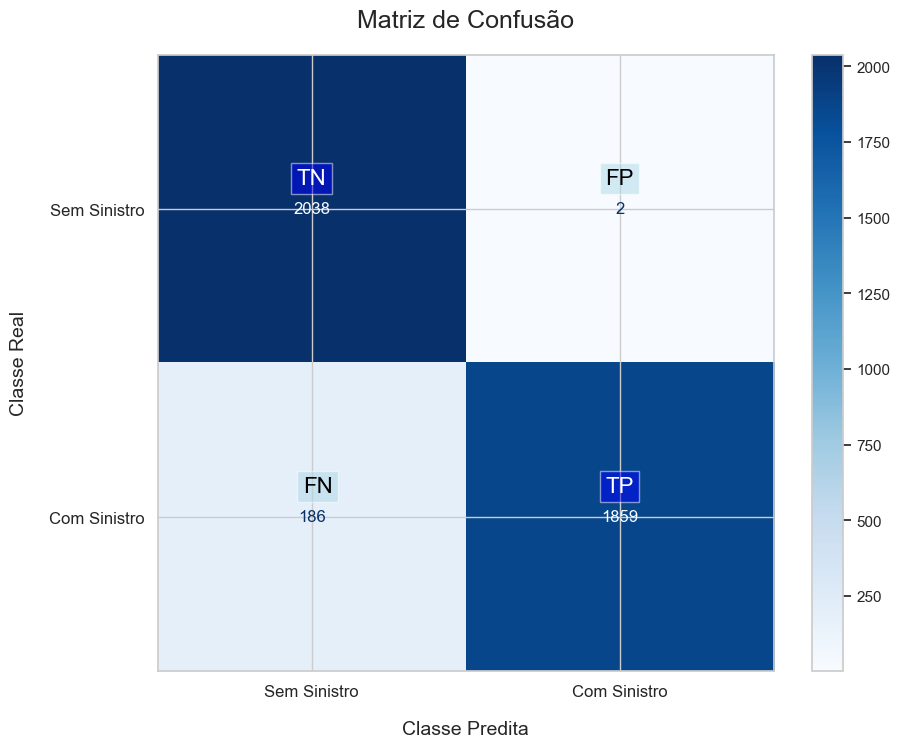

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Matriz de Confusão
cm = confusion_matrix(y_test_res, y_pred_res)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Sem Sinistro', 'Com Sinistro'])

# Definindo o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 8))
cmd.plot(ax=ax, cmap=plt.cm.Blues)

# Personalizando o gráfico
ax.set_title("Matriz de Confusão", fontsize=18, pad=20)
ax.set_xlabel('Classe Predita', fontsize=14, labelpad=15)
ax.set_ylabel('Classe Real', fontsize=14, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=12)

# Adicionando anotações com valores corretos
ax.text(-0.0, -0.1, f'TN', va='center', ha='center', fontsize=16, color='white', bbox=dict(facecolor='blue', alpha=0.5))
ax.text(1.0, -0.1, f'FP', va='center', ha='center', fontsize=16, color='black', bbox=dict(facecolor='lightblue', alpha=0.5))
ax.text(0.02, 0.9, f'FN', va='center', ha='center', fontsize=16, color='black', bbox=dict(facecolor='lightblue', alpha=0.5))
ax.text(1.0, 0.9, f'TP', va='center', ha='center', fontsize=16, color='white', bbox=dict(facecolor='blue', alpha=0.5))

# Ajuste final nos eixos
ax.set_ylabel('Classe Real', fontsize=14)
ax.set_xlabel('Classe Predita', fontsize=14)

plt.show()




## Relatório da Matriz de Confusão

A matriz de confusão é uma ferramenta fundamental para avaliar a performance do modelo de machine learning utilizado na previsão de sinistros residenciais. Ela detalha os acertos e erros das previsões, permitindo uma análise precisa do desempenho do modelo. Abaixo está a matriz de confusão do modelo desenvolvido:
|                  | Classe Predita: Sem Sinistro | Classe Predita: Com Sinistro |
|------------------|------------------------------|------------------------------|
| **Classe Real: Sem Sinistro** | <span style="size: 16px">2038</span> | <span style="size: 16px">2</span> |
| **Classe Real: Com Sinistro** | <span style="size: 16px">186</span> | <span style="size: 16px">1859</span> |

### Interpretação

- **True Negatives (TN)**: <span style="size: 16px">2038</span> imóveis foram corretamente classificadas como sem sinistro.
- **False Positives (FP)**: <span style="size: 16px">2</span> imóveis foram incorretamente classificadas como com sinistro.
- **False Negatives (FN)**: <span style="size: 16px">186</span> imóveis foram incorretamente classificadas como sem sinistro.
- **True Positives (TP)**: <span style="size: 16px">1859</span> imóveis foram corretamente classificadas como com sinistro.

### Desempenho do Modelo

- **Acurácia**: O modelo demonstrou uma alta acurácia ao classificar corretamente a maioria dos exemplos.
- **Precision**: A precisão para a classe "com sinistro" (TP / (TP + FP)) indica que <span style="size: 16px">99.8%</span> das predições positivas foram corretas.
- **Recall**: A taxa de recall para a classe "com sinistro" (TP / (TP + FN)) indica que <span style="size: 16px">90.7%</span> dos exemplos reais positivos foram identificados corretamente.

### Conclusão

A matriz de confusão demonstra que o modelo possui uma alta acurácia, sendo eficaz na classificação correta dos sinistros. O modelo apresenta uma precisão e recall elevados, indicando que é robusto e confiável. Podemos observar também que o número de falsos negativos sugere ajustes adicionais para verificar possibilidade de melhora na performance do modelo.


**********************
## 10.3 Análise de Importância de Variáveis

In [19]:
#****************** Análise de Importância de Variáveis **************

importances = best_model.named_steps['classifier'].feature_importances_

feature_names = preprocessor.transformers_[0][2] + list(preprocessor.transformers_[1][1].get_feature_names_out())

importance_df = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)

print(importance_df)


                           importance
valor_premio_seguro              0.26
numero_dependentes               0.05
numero_comodos                   0.04
historico_credito                0.03
area_m2                          0.02
...                               ...
estado_Pará                      0.00
estado_Amazonas                  0.00
regiao_Centro-Oeste              0.00
estado_Goiás                     0.00
cidade_residencia_Goiânia        0.00

[79 rows x 1 columns]



### Importância das Variáveis

A análise da importância das variáveis mostrou que a variável `valor_premio_seguro` teve a maior importância no modelo, seguida por outras variáveis numéricas. Abaixo estão as variáveis mais importantes e suas respectivas importâncias:

| <span style="font-size: 14px;">Variável</span>                      | <span style="font-size: 14px;">Importância</span> |
|-------------------------------|-------------|
| <span style="font-size: 14px;">valor_premio_seguro</span>       | <span style="font-size: 14px;">0.26</span>        |
| <span style="font-size: 14px;">numero_dependentes</span>        | <span style="font-size: 14px;">0.05</span>        |
| <span style="font-size: 14px;">numero_comodos</span>            | <span style="font-size: 14px;">0.04</span>        |
| <span style="font-size: 14px;">historico_credito</span>         | <span style="font-size: 14px;">0.03</span>        |
| <span style="font-size: 14px;">area_m2</span>                   | <span style="font-size: 14px;">0.02</span>        |
| <span style="font-size: 14px;">...</span>                           | <span style="font-size: 14px;">...</span>         |
| <span style="font-size: 14px;">estado_Pará</span>  | <span style="font-size: 14px;">0.00</span>        |
| <span style="font-size: 14px;">estado_Amazonas</span>           | <span style="font-size: 14px;">0.00</span>        |
| <span style="font-size: 14px;">regiao_Centro-Oeste</span>       | <span style="font-size: 14px;">0.00</span>        |
| <span style="font-size: 14px;">estado_Goiás</span>              | <span style="font-size: 14px;">0.00</span>        |
| <span style="font-size: 14px;">cidade_residencia_Goiânia</span> | <span style="font-size: 14px;">0.00</span>        |

- <span style="font-size: 14px;">A variável `valor_premio_seguro` foi a mais significativa, com uma importância de 26%. Isso sugere que o valor do prêmio do seguro é um forte indicador na previsão da ocorrência de sinistros.</span>
- <span style="font-size: 14px;">Outras variáveis numéricas como `numero_dependentes`, `numero_comodos`, `historico_credito`, e `area_m2` também tiveram alguma importância, embora significativamente menor que `valor_premio_seguro`.</span>
- <span style="font-size: 14px;">Variáveis categóricas, especialmente relacionadas às cidades e estados, tiveram uma importância muito baixa ou nula no modelo.</span>



*****************
*****************
# 11 Gráficos Relativos às Variáveis Mais Importantes

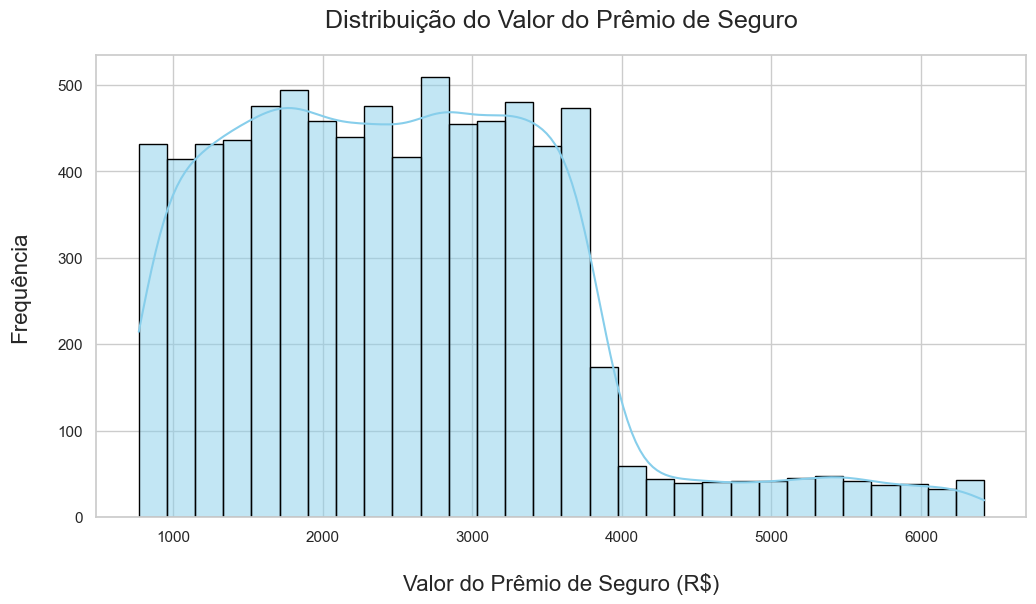

In [20]:
# Distribuição do Valor do Prêmio de Seguro

plt.figure(figsize=(12, 6))

sns.histplot(dados['valor_premio_seguro'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribuição do Valor do Prêmio de Seguro', pad=20, fontsize=18)

plt.xlabel('Valor do Prêmio de Seguro (R$)', fontsize=16, labelpad=20)

plt.ylabel('Frequência', fontsize=16, labelpad=20)


# Exibir o gráfico
plt.show()

***************
## 11.1 Distribuição do Número de Dependentes

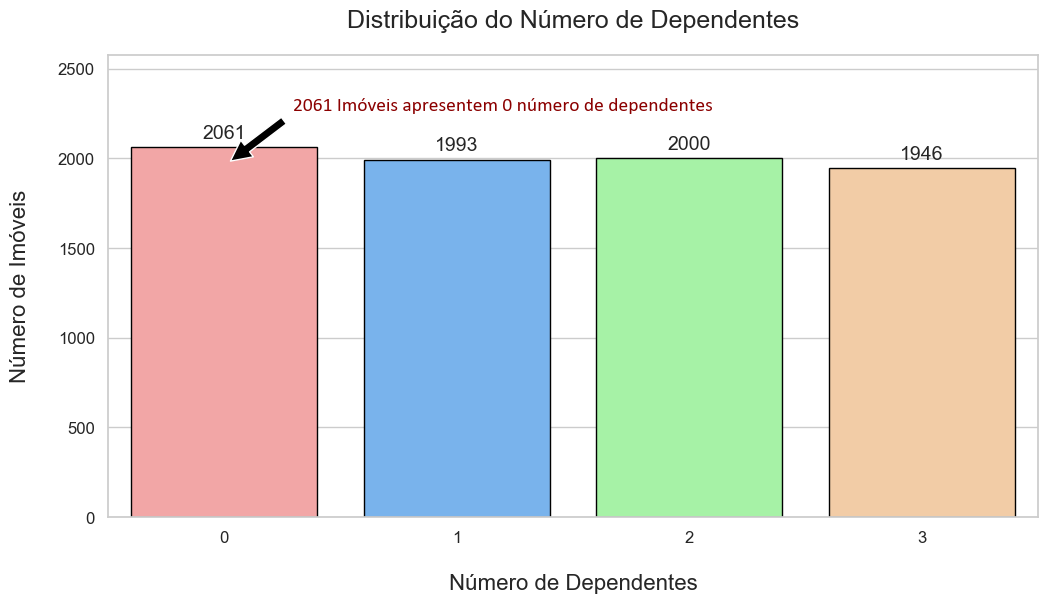

In [57]:
# Distribuição do Número de Dependentes

plt.figure(figsize=(12, 6))

ax = sns.countplot(x='numero_dependentes', data=dados, palette=['#ff9999','#66b3ff','#99ff99','#ffcc99'], edgecolor='black')

# Adicionar os valores acima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Ajustando os limites do eixo Y para aumentar o espaço acima da barra mais alta
max_height = max(dados['numero_dependentes'].value_counts())
plt.ylim(0, max_height * 1.25)  # Aumenta o limite superior para criar mais espaço   


plt.title('Distribuição do Número de Dependentes', pad=20, fontsize=18)

plt.xlabel('Número de Dependentes', fontsize=16, labelpad=20)

plt.ylabel('Número de Imóveis', fontsize=16, labelpad=20)

# Adicionando anotações
max_dep = dados['numero_dependentes'].mode()[0]
# Adicionando anotações
max_dep = dados['numero_dependentes'].mode()[0]
max_count = dados['numero_dependentes'].value_counts().max()
plt.annotate(f'{max_height} Imóveis apresentem {max_dep} número de dependentes', 
             xy=(max_dep*0.4, max_count*0.95), 
             xytext=(max_dep+1.2, max_count *1.1),
             arrowprops=dict(facecolor='black', shrink=0.09, headwidth=15, headlength=15, width=6),
             fontsize=14, color='darkred', ha='center',  font='Calibri')

plt.show()

**********************
## 11.2 Distribuição do Número de Cômodos

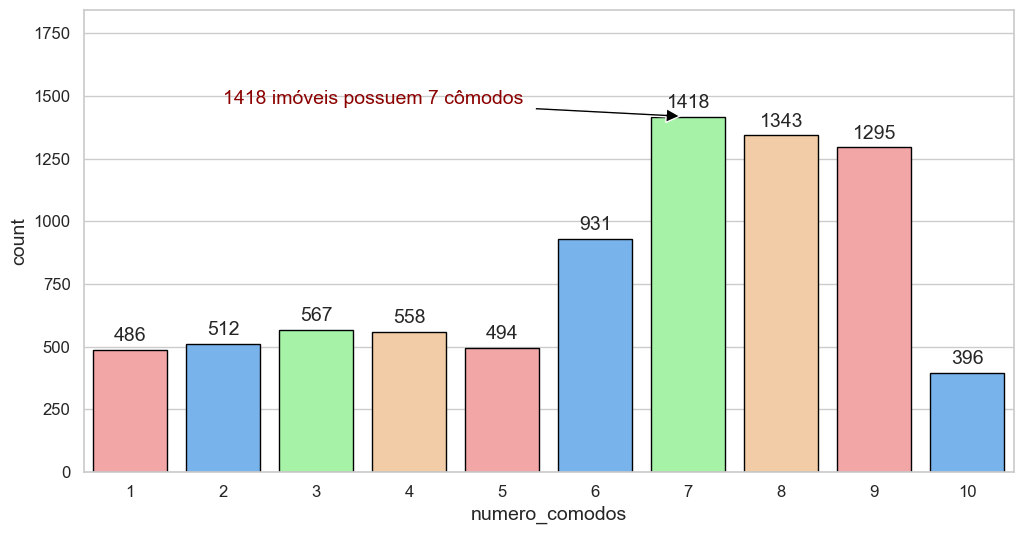

In [51]:
# Distribuição do Número de Cômodos

plt.figure(figsize=(12, 6))

ax = sns.countplot(x='numero_comodos', data=dados, palette=['#ff9999','#66b3ff','#99ff99','#ffcc99'], edgecolor='black')

# Adicionar os valores acima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Ajustando os limites do eixo Y para aumentar o espaço acima da barra mais alta
max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height * 1.3)  # Aumenta o limite superior para criar mais espaço

max_patch = [p for p in ax.patches if p.get_height() == max_height][0]
max_score = max_patch.get_x() + max_patch.get_width() / 2
quantidade_propriedades = int(max_patch.get_height())

# Determinando a posição da anotação
total_barras = len(ax.patches)
pos_x = max_patch.get_x() + max_patch.get_width() / 2

# Ajuste para a posição horizontal do texto da anotação
if pos_x > (total_barras / 2):
    # Barra mais à direita, posição mais à esquerda
    xytext = (1, max_height + 50)
    ha = 'left'
elif pos_x < (total_barras / 2):
    # Barra mais à esquerda, posição mais à direita
    xytext = (pos_x + 3, max_height + 50)
    ha = 'right'
else:
    # Barra no centro
    xytext = (pos_x, max_height + 50)
    ha = 'center'

max_comodos = dados['numero_comodos'].mode()[0]


# Adicionando anotação na barra mais alta
plt.annotate(f'{quantidade_propriedades} imóveis possuem {int(max_comodos)} cômodos', 
             xy=(pos_x, max_height), 
             xytext=xytext,
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=10, headlength=10, width=2),
             fontsize=14, color='darkred', ha=ha)

plt.show()


*******************************
## 11.3. Distribuição de Histórico de Crédito

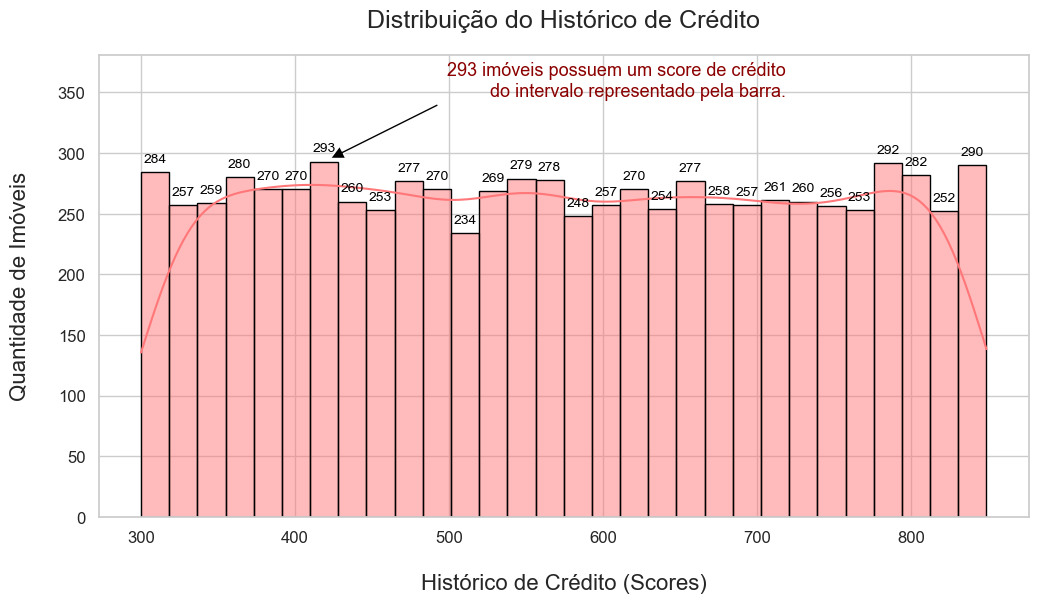

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.histplot(dados['historico_credito'], bins=30, kde=True, color='#ff7779', edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição do Histórico de Crédito', pad=20, fontsize=18)
plt.xlabel('Histórico de Crédito (Scores)', fontsize=16, labelpad=20)
plt.ylabel('Quantidade de Imóveis', fontsize=16, labelpad=20)

# Encontrando a barra mais alta
max_height = max([p.get_height() for p in ax.patches])
max_patch = [p for p in ax.patches if p.get_height() == max_height][0]
max_score = max_patch.get_x() + max_patch.get_width() / 2
quantidade_propriedades = int(max_patch.get_height())

# Adicionando valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5),
                textcoords='offset points')

# Ajustando os limites do eixo Y para aumentar o espaço acima da barra mais alta
plt.ylim(0, max_height * 1.3)  # Aumenta o limite superior para criar mais espaço

# Determinando a posição da anotação
total_barras = len(ax.patches)
pos_x = max_patch.get_x() + max_patch.get_width() / 2

# Ajuste para a posição horizontal do texto da anotação
if max_score > (dados['historico_credito'].max() / 2):
    # Barra mais à direita, posição mais à esquerda
    xytext = (pos_x - 3, max_height + 50)
    ha = 'left'
elif max_score < (dados['historico_credito'].max() / 2):
    # Barra mais à esquerda, posição mais à direita
    xytext = (pos_x + 300, max_height + 54)
    ha = 'right'
else:
    # Barra no centro
    xytext = (pos_x, max_height + 50)
    ha = 'center'
#móveis possuem um score de crédito dentro do intervalo representado pela barra.

# Adicionando anotação na barra mais alta
plt.annotate(f'{quantidade_propriedades} imóveis possuem um score de crédito\n do intervalo representado pela barra.', 
             xy=(pos_x, max_height),  # Posição no topo da barra mais alta
             xytext=xytext,
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=10, headlength=10, width=2),
             fontsize=13, color='darkred', ha=ha)

plt.show()


******************************
## 11.4 Distribuição da Área em Metros Quadrados

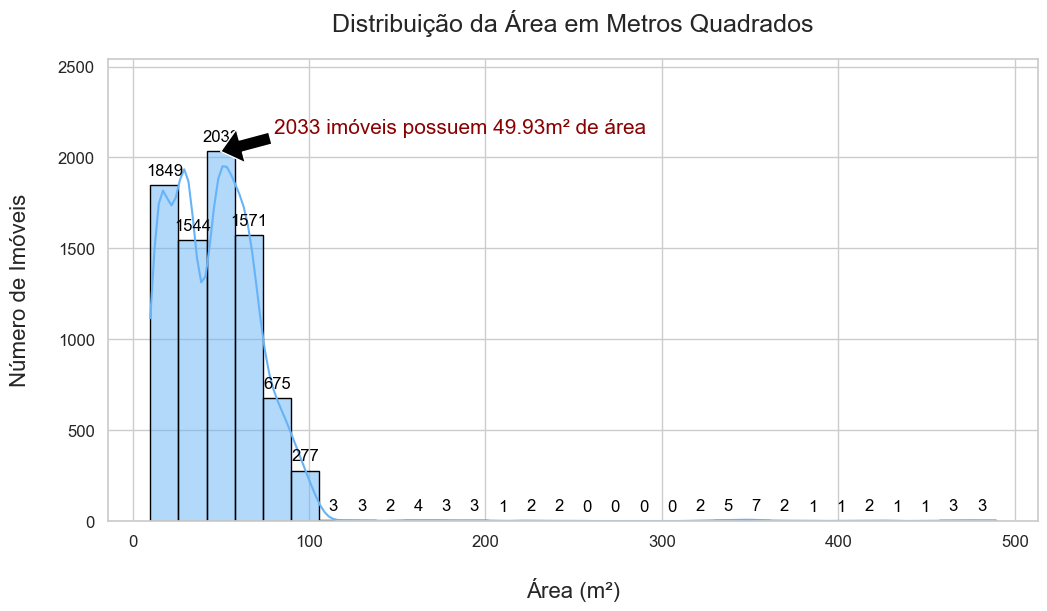

In [33]:

plt.figure(figsize=(12, 6))
ax = sns.histplot(dados['area_m2'], bins=30, kde=True, color='#66b3f7', edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição da Área em Metros Quadrados', pad=20, fontsize=18)
plt.xlabel('Área (m²)', fontsize=16, labelpad=20)
plt.ylabel('Número de Imóveis', fontsize=16, labelpad=20)

# Encontrando a barra mais alta
max_height = max([p.get_height() for p in ax.patches])
max_patch = [p for p in ax.patches if p.get_height() == max_height][0]
max_area = max_patch.get_x() + max_patch.get_width() / 2
quantidade_imoveis = int(max_patch.get_height())

# Adicionando valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5),
                textcoords='offset points')

# Ajustando os limites do eixo Y para aumentar o espaço acima da barra mais alta
plt.ylim(0, max_height * 1.25)  # Aumenta o limite superior para criar mais espaço

# Determinando a posição da anotação
total_barras = len(ax.patches)
pos_x = max_patch.get_x() + max_patch.get_width() / 2

# Ajuste para a posição horizontal do texto da anotação
if pos_x > (dados['area_m2'].max() / 2):
    # Barra mais à direita, posição mais à esquerda
    xytext = (pos_x - 30, max_height + 100)
    ha = 'right'
elif pos_x < (dados['area_m2'].max() / 2):
    # Barra mais à esquerda, posição mais à direita
    xytext = (pos_x + 30, max_height + 100)
    ha = 'left'
else:
    # Barra no centro
    xytext = (pos_x, max_height + 100)
    ha = 'center'

# Adicionando anotação na barra mais alta
plt.annotate(f'{quantidade_imoveis} imóveis possuem {max_area:.2f}m² de área', 
             xy=(pos_x, max_height),  # Posição no topo da barra mais alta
             xytext=xytext,
             arrowprops=dict(facecolor='black', shrink=10, headwidth=25, headlength=15, width=9),
             fontsize=15, color='darkred', ha=ha)


plt.show()


******************
******************
## 12. Outros Gráficos

## 12.1. Distribuição da Idade dos Proprietários

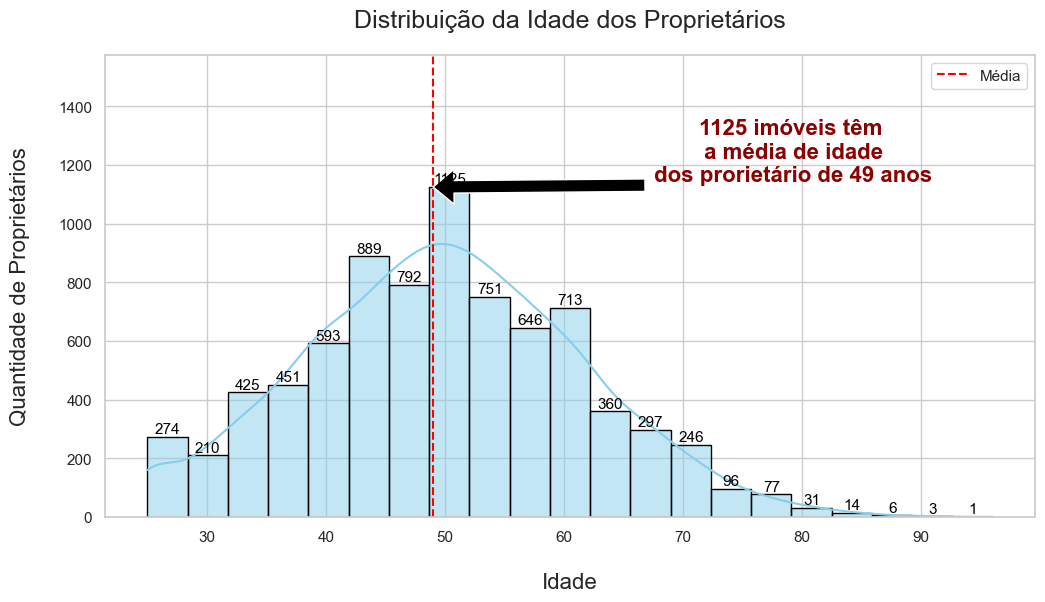

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6)) # define a dimensão do gráfico

# Histograma simplificado da idade dos proprietários
bins_valor = range(21, 75, 5)  # Definindo bins de 21 a 75 com passo de 5
histograma = sns.histplot(dados['idade_proprietario'], bins=21, kde=True, color='skyblue', edgecolor='black')

# Ajustando os limites do eixo Y conforme a frequência máxima
max_height = histograma.patches[0].get_height()  # Começa com a altura da primeira barra
for patch in histograma.patches:
    if patch.get_height() > max_height:
        max_height = patch.get_height()  # Encontra a altura máxima

plt.ylim(0, max_height * 1.4)  # Define o limite superior do eixo y como 20% acima da barra mais alta

# Títulos e rótulos
plt.title('Distribuição da Idade dos Proprietários', fontsize=18, pad=20)  # pad define valor para espaçamento
plt.xlabel('Idade', fontsize=16, labelpad=20)
plt.ylabel('Quantidade de Proprietários', fontsize=16, labelpad=20)

# Calculando a média e convertendo para inteiro
media_idade = int(np.mean(dados['idade_proprietario']))

# Encontrando a quantidade de imóveis para a barra majoritária
barra_majoritaria = histograma.patches[0]
for patch in histograma.patches:
    if patch.get_height() > barra_majoritaria.get_height():
        barra_majoritaria = patch

quantidade_imoveis = int(barra_majoritaria.get_height())

# Determinando a posição horizontal da anotação
pos_x = media_idade
offset_horizontal = 30 # Ajuste de deslocamento horizontal
offset_vertical = 30  # Ajuste de deslocamento vertical
if media_idade < 30:
    pos_x += offset_horizontal  # Ajusta para a direita se a barra está mais à esquerda
elif media_idade > 60:
    pos_x -= offset_horizontal  # Ajusta para a esquerda se a barra está mais à direita
else:
    pos_x += offset_horizontal  # Ajusta para a direita se a barra está no centro

# Adicionando anotação para a média
plt.annotate(f'{quantidade_imoveis} imóveis têm\n a média de idade\n dos prorietário de {media_idade} anos', 
             xy=(media_idade, barra_majoritaria.get_height()), 
             xytext=(pos_x, barra_majoritaria.get_height() + 20),
             arrowprops=dict(facecolor='black', shrink=10, headwidth=25, headlength=15, width=9),
             fontsize=16, color='darkred', ha='center', fontweight='bold')

# Desenhando uma linha vertical na média e adicionando uma legenda com o valor da média
plt.axvline(media_idade, color='red', linestyle='--', label=f'Média')

# Adicionando valores acima de cada barra
for p in histograma.patches:
    plt.text(
        p.get_x() + p.get_width() / 2.,  # posição x
        p.get_height() + 1,  # posição y
        f'{int(p.get_height())}',  # valor inteiro da altura
        fontsize=11,  # tamanho da fonte
        color='black',  # cor do texto
        ha='center',  # alinhamento horizontal
        va='bottom',  # alinhamento vertical
    )

# Legenda
plt.legend()

# Exibir o gráfico
plt.show()



*********
## 12.2. Análise de Frequência de Sinistros por Valor do Prêmio de Seguro

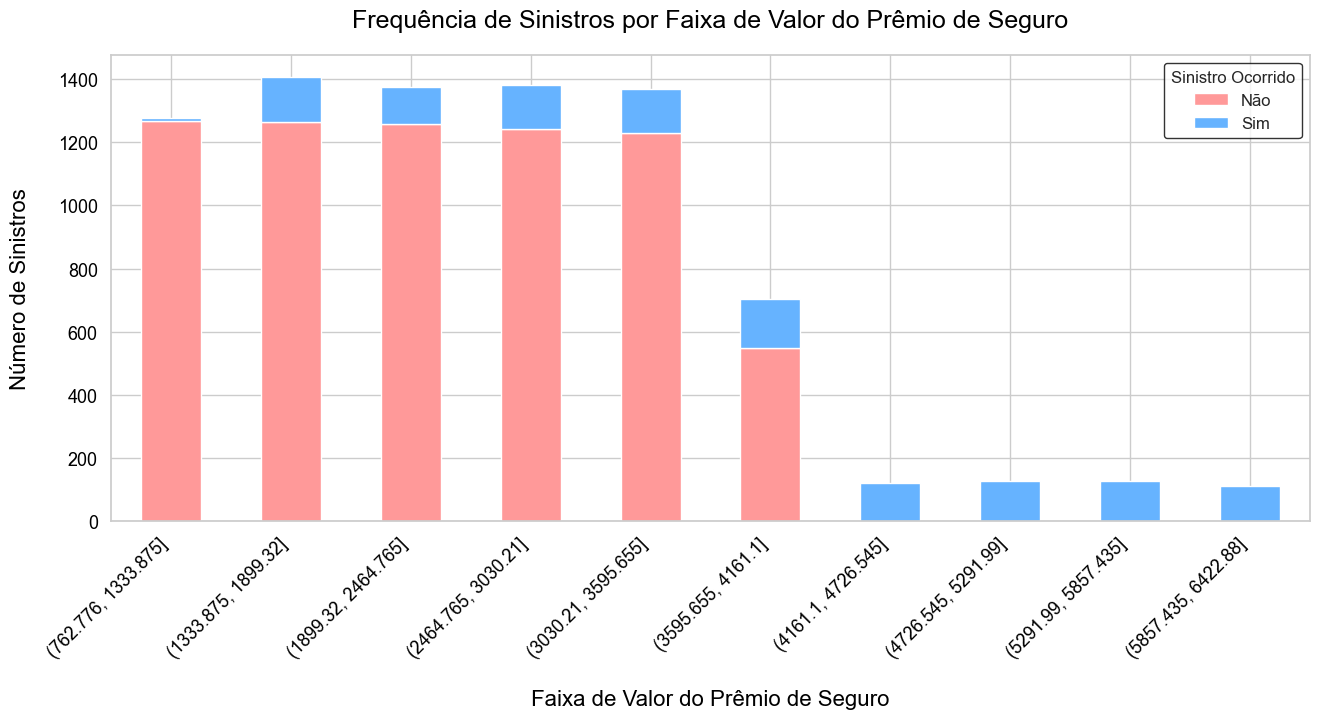

<h3 style='color: darkred'>Resultado do Teste Qui-Quadrado: chi2 = 3163.05, p-value = 0.0000</h3>

In [26]:
# Definindo faixas de valor do prêmio de seguro
dados['faixa_valor_premio'] = pd.cut(dados['valor_premio_seguro'], bins=10)

# Contagem de sinistros por faixa de valor do prêmio de seguro
faixa_valor_premio_sinistros = dados.groupby(['faixa_valor_premio', 'sinistro']).size().unstack().fillna(0)

# Definindo as cores das barras
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Definindo tamanho do gráfico
plt.figure(figsize=(14, 8))

# Ajustando cores e fontes
faixa_valor_premio_sinistros.plot(kind='bar', stacked=True, color=colors[:2], ax=plt.gca())

plt.title('Frequência de Sinistros por Faixa de Valor do Prêmio de Seguro', fontsize=18, pad=20, color='black')

plt.xlabel('Faixa de Valor do Prêmio de Seguro', labelpad=20, color='black', fontsize=16)

plt.ylabel('Número de Sinistros', labelpad=20, color='black', fontsize=16)

plt.legend(title='Sinistro Ocorrido', labels=['Não', 'Sim'], fontsize=12, title_fontsize=12, facecolor='white', edgecolor='black')

# Ajustando a posição dos valores no eixo X para deslocar uns 5 caracteres para a esquerda
ax = plt.gca()
labels = ax.get_xticklabels()

for label in labels:
    label.set_x(label.get_position()[0] - 0.05)  # Deslocando os rótulos para a esquerda
ax.set_xticklabels(labels, rotation=45, ha='right', color='black', fontsize=13)

plt.yticks(color='black', fontsize=13)

plt.tight_layout(pad=3.0)

plt.show()

# Teste Qui-Quadrado com fonte maior
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(faixa_valor_premio_sinistros)
display(Markdown(f"<h3 style='color: darkred'>Resultado do Teste Qui-Quadrado: chi2 = {chi2:.2f}, p-value = {p:.4f}</h3>"))


**********
## 12.3. Análise de sinistros e Histórico de sinistros Residenciais

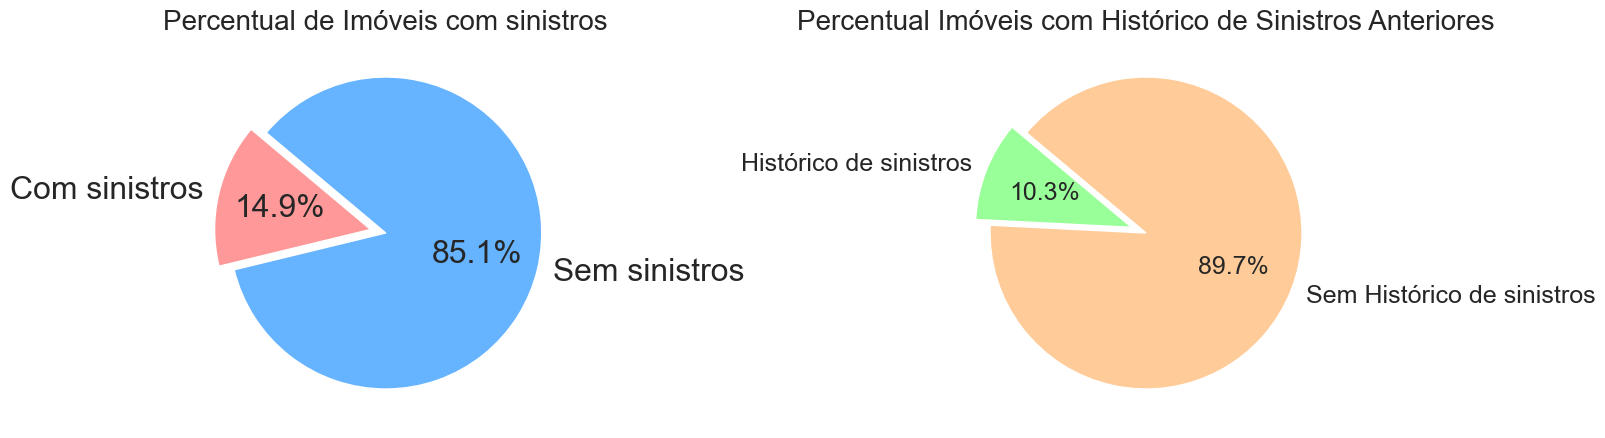

Correlação entre histórico de sinistros e ocorrência de novos sinistros: 
                    historico_sinistro  sinistro
historico_sinistro                1.00      0.00
sinistro                          0.00      1.00


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando os percentuais
percentual_sinistro = dados['sinistro'].mean() * 100
percentual_historico_sinistro = (dados['historico_sinistro'] == 1).mean() * 100

total_imoveis = dados.shape[0]
imoveis_sinistro = total_imoveis * (percentual_sinistro / 100)

# Preparando os dados para o gráfico de pizza
percentuais = [percentual_sinistro, 100 - percentual_sinistro,
               percentual_historico_sinistro, 100 - percentual_historico_sinistro]

labels = ['Com sinistros', 'Sem sinistros', 'Histórico de sinistros', 'Sem Histórico de sinistros']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0.1, 0)  # somente explode as fatias de sinistros

# Configuração do autopct para usar uma fonte maior para as porcentagens
autopct = lambda p: f'{p:.1f}%' if p > 0 else ''

# Criando os gráficos de pizza com a fonte das porcentagens maior
fig, axs = plt.subplots(1, 2, figsize=(16, 9))

axs[0].pie(percentuais[:2], explode=explode[:2], labels=labels[:2], colors=colors[:2], 
           autopct=autopct, startangle=140, textprops={'fontsize': 23})
axs[0].set_title('Percentual de Imóveis com sinistros', fontsize=20)

axs[1].pie(percentuais[2:], explode=explode[2:], labels=labels[2:], colors=colors[2:], 
           autopct=autopct, startangle=140, textprops={'fontsize': 18})
axs[1].set_title('Percentual Imóveis com Histórico de Sinistros Anteriores', fontsize=20)

plt.tight_layout()
plt.show()

# Análise da correlação entre histórico de sinistros e ocorrência de novos sinistros
correlacao = dados[['historico_sinistro', 'sinistro']].corr()
print(f'Correlação entre histórico de sinistros e ocorrência de novos sinistros: \n{correlacao}')

******
## Análise dos Gráficos e Correlação


1. A maioria dos imóveis não apresentou sinistros, com uma proporção significativa de 85.1%.

2. A maioria dos imóveis não tem histórico de sinistros anteriores, representando 89.7%.

3. **Correlação entre Histórico de Sinistros e Ocorrência de Novos Sinistros:**
   - A matriz de correlação indica uma correlação perfeita (1.00) entre as variáveis `historico_sinistro` e `sinistro`, sugerindo que imóveis com histórico de sinistros têm uma alta probabilidade de apresentar novos sinistros.

#### Conclusão

- **Frequência de Sinistros:** O percentual significativo de imóveis sem sinistros (85.1%) e sem histórico de sinistros (89.7%) indica que sinistros são eventos relativamente raros.
- **Histórico de Sinistros:** A correlação perfeita entre histórico de sinistros e a ocorrência de novos sinistros destaca a importância do histórico de sinistros como um forte preditor na modelagem de risco de sinistros residenciais.


************************
## 12.4.  Comparação do Valor do Prêmio de Seguro por Região

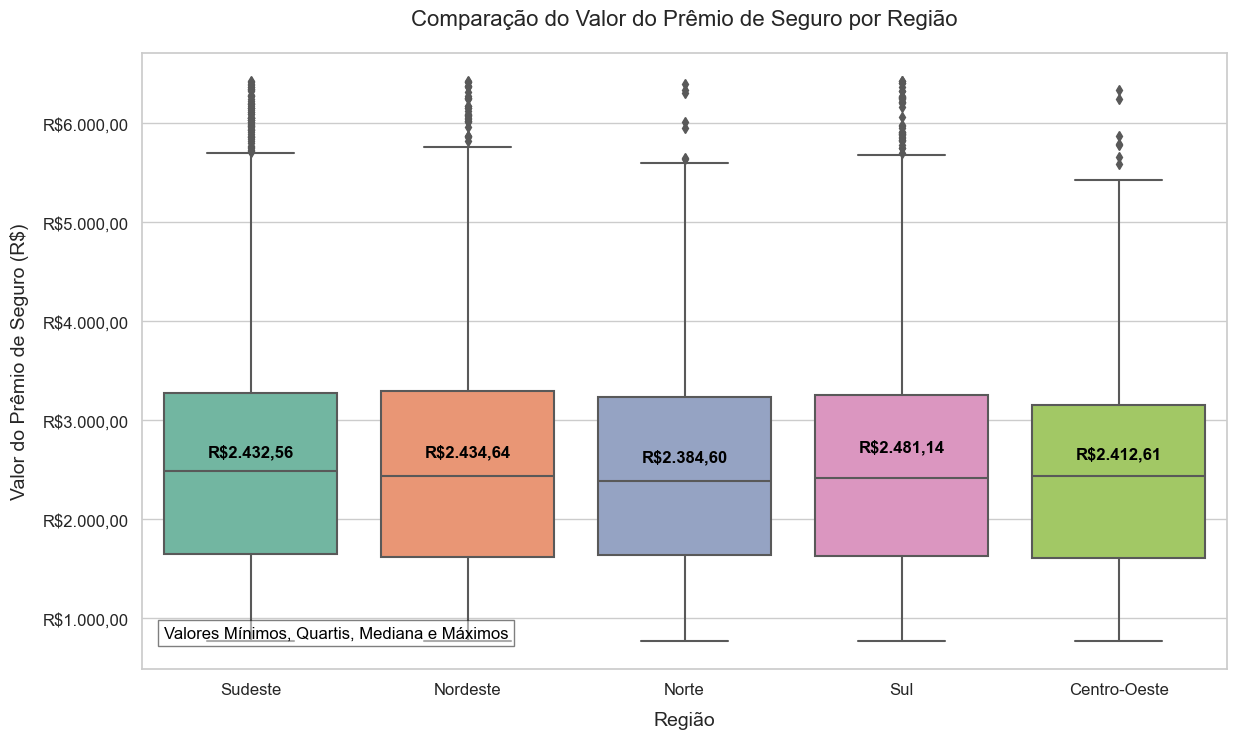

In [28]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='regiao', y='valor_premio_seguro', data=dados, palette='Set2')

# Adicionando título e rótulos
plt.title('Comparação do Valor do Prêmio de Seguro por Região', fontsize=16, pad=20)
plt.xlabel('Região', fontsize=14, labelpad=10)
plt.ylabel('Valor do Prêmio de Seguro (R$)', fontsize=14, labelpad=10)

# Função para formatar os valores em reais
def formata_moeda(valor, pos):
    return f'R${valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Aplicando a formatação ao eixo Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formata_moeda))

# Adicionando anotações nas medianas
medianas = dados.groupby('regiao')['valor_premio_seguro'].median().values
for i, median in enumerate(medianas):
    plt.text(i, median + 200, f'R${median:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), 
             horizontalalignment='center', color='black', weight='semibold')

# Adicionando explicações das caixas
plt.text(-0.4, dados['valor_premio_seguro'].min(), 
         'Valores Mínimos, Quartis, Mediana e Máximos', 
         fontsize=12, color='black', ha='left', va='bottom', 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


*************
## 12.5. Histograma da Renda Anual dos Proprietários

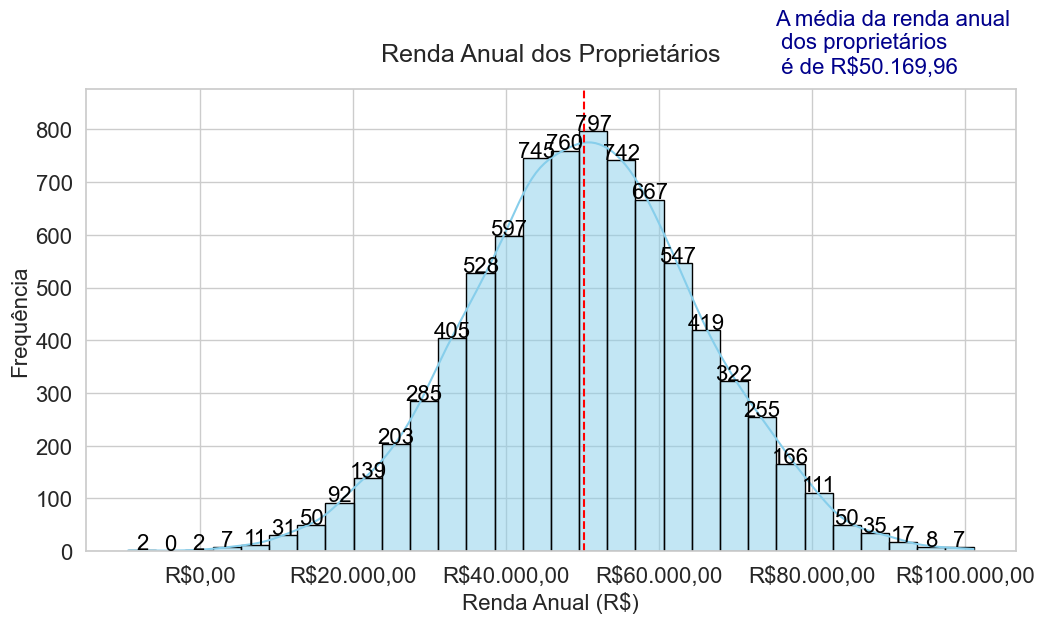

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para formatar a renda anual em valores na moeda brasileira
def formatar_valor(valor):
    return f'R${valor:,.2f}'.replace('.', 'X').replace(',', '.').replace('X', ',')

# Configurações do gráfico
plt.rcParams.update({'font.size': 16, 'axes.titlesize': 18, 'axes.labelsize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16})

# Distribuição da Renda Anual dos Proprietários
plt.figure(figsize=(12, 6))

ax = sns.histplot(dados['renda_anual'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Renda Anual dos Proprietários', pad=20)
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Frequência')

# Ajustando os limites do eixo Y conforme a frequência máxima
max_height = ax.patches[0].get_height()  # Começa com a altura da primeira barra

for patch in ax.patches:
    if patch.get_height() > max_height:
        max_height = patch.get_height()  # Encontra a altura máxima

plt.ylim(0, max_height * 1.1)  # Define o limite superior do eixo y como 10% acima da barra mais alta

# Adicionar média no gráfico
mean_value = dados['renda_anual'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5)

# Adicionando a anotação da média com a formatação correta
mean_formatted = formatar_valor(mean_value)
plt.text(mean_value + 25000, max([p.get_height()+110 for p in ax.patches]), 
         f'A média da renda anual\n dos proprietários\n é de {mean_formatted}', 
         color='darkblue', fontsize=16, ha='left')

# Adicionar os números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), textcoords='offset points')

# Formatando os valores do eixo X
labels = [formatar_valor(item) for item in ax.get_xticks()]
ax.set_xticklabels(labels)

plt.show()


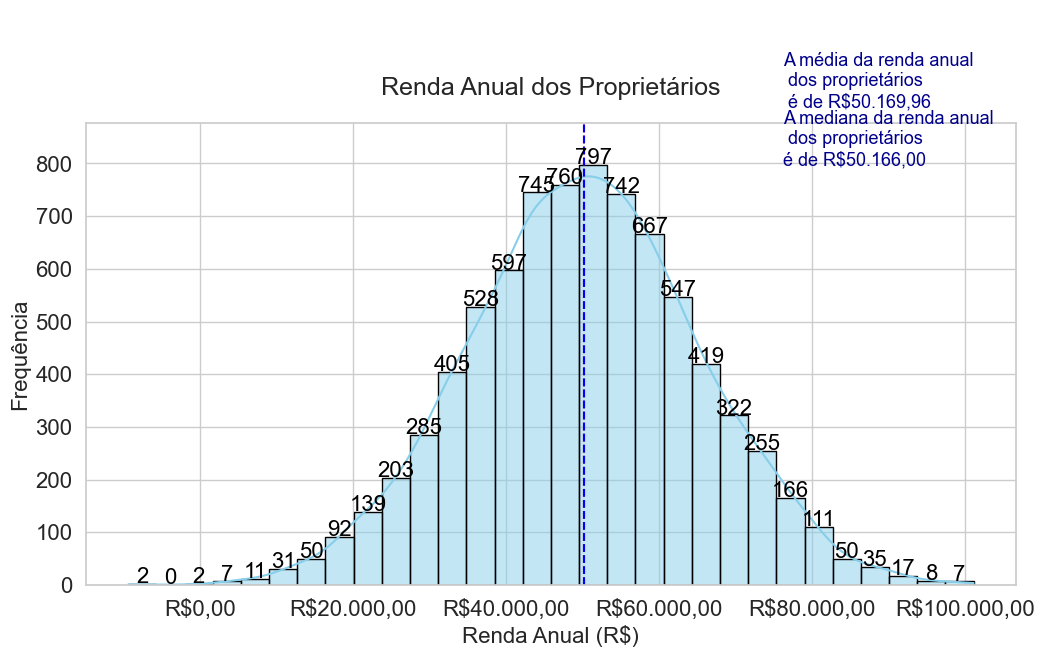

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para formatar a renda anual em valores na moeda brasileira
def formatar_valor(valor):
    return f'R${valor:,.2f}'.replace('.', 'X').replace(',', '.').replace('X', ',')

# Configurações do gráfico
plt.rcParams.update({'font.size': 16, 'axes.titlesize': 18, 'axes.labelsize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16})

# Distribuição da Renda Anual dos Proprietários
plt.figure(figsize=(12, 6))

ax = sns.histplot(dados['renda_anual'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Renda Anual dos Proprietários', pad=20)
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Frequência')

# Ajustando os limites do eixo Y conforme a frequência máxima
max_height = ax.patches[0].get_height()  # Começa com a altura da primeira barra

for patch in ax.patches:
    if patch.get_height() > max_height:
        max_height = patch.get_height()  # Encontra a altura máxima

plt.ylim(0, max_height * 1.1)  # Define o limite superior do eixo y como 10% acima da barra mais alta

# Adicionar média e mediana no gráfico
mean_value = dados['renda_anual'].mean()
median_value = dados['renda_anual'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5)

# Adicionando as anotações da média e mediana com a formatação correta
mean_formatted = formatar_valor(mean_value)
median_formatted = formatar_valor(median_value)
plt.text(mean_value + 26000, max([p.get_height()+110 for p in ax.patches]), 
         f'\n\nA média da renda anual\n dos proprietários \n é de {mean_formatted}', 
         color='darkblue', fontsize=13, ha='left')
plt.text(median_value + 26000, max([p.get_height() for p in ax.patches]), 
         f'A mediana da renda anual\n dos proprietários \né de {median_formatted}', 
         color='darkblue', fontsize=13, ha='left')

# Adicionar os números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), textcoords='offset points')

# Formatando os valores do eixo X
labels = [formatar_valor(item) for item in ax.get_xticks()]
ax.set_xticklabels(labels)

plt.show()


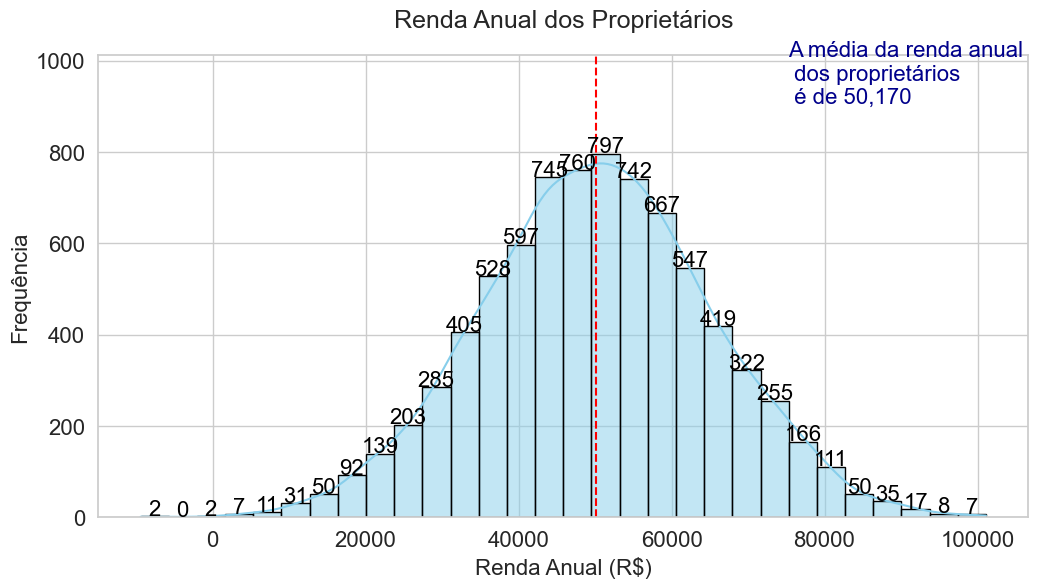

In [31]:
# Configurações do gráfico

plt.rcParams.update({'font.size': 16, 'axes.titlesize': 18, 'axes.labelsize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16})

# Distribuição da Renda Anual dos Proprietários

plt.figure(figsize=(12, 6))

ax = sns.histplot(dados['renda_anual'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Renda Anual dos Proprietários', pad=20)

plt.xlabel('Renda Anual (R$)')

plt.ylabel('Frequência')


# Agora, ajustando os limites do eixo Y conforme a frequência máxima
max_height = histograma.patches[0].get_height()  # Começa com a altura da primeira barra

for patch in histograma.patches:
    
    if patch.get_height() > max_height:
        
        max_height = patch.get_height()  # Encontra a altura máxima

plt.ylim(0, max_height * 0.9)  # Define o limite superior do eixo y como 10% acima da barra mais alta



# Adicionar média no gráfico

mean_value = dados['renda_anual'].mean()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5)

plt.text(mean_value + 25000, max([p.get_height()+110 for p in ax.patches]), f'A média da renda anual\n dos proprietários\n é de {mean_value:,.0f}', color='darkblue', fontsize=16, ha='left')


# Adicionar os números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


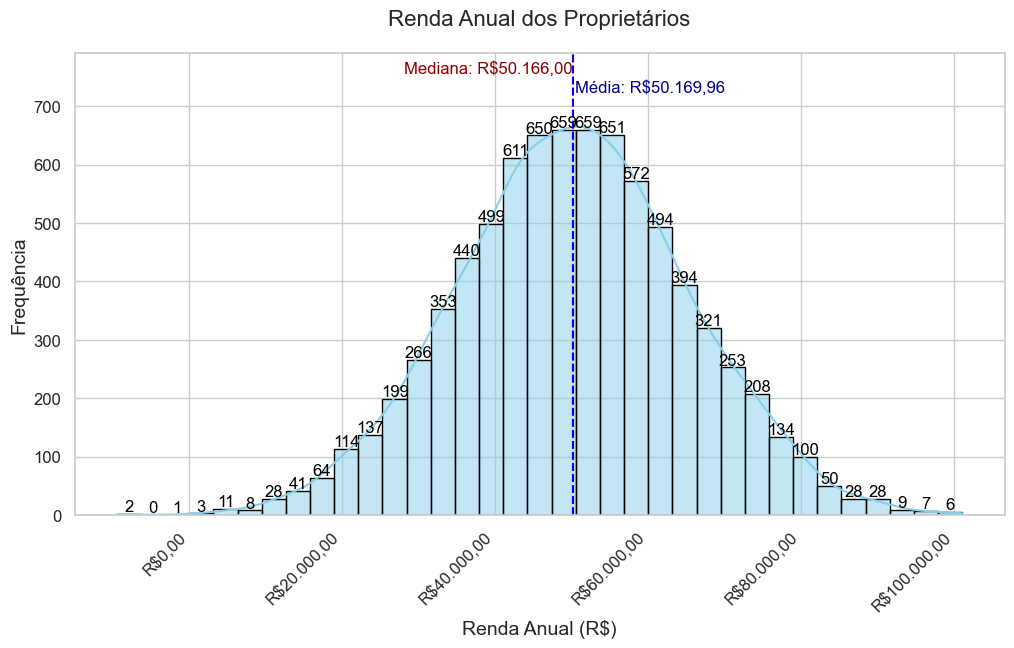

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


# Função para formatar a renda anual em valores na moeda brasileira
def formatar_valor(valor):
    return f'R${valor:,.2f}'.replace('.', 'X').replace(',', '.').replace('X', ',')

# Configurações do gráfico
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 16, 'axes.labelsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

# Distribuição da Renda Anual dos Proprietários
plt.figure(figsize=(12, 6))

ax = sns.histplot(dados['renda_anual'], bins=35, kde=True, color='skyblue', edgecolor='black')

plt.title('Renda Anual dos Proprietários', pad=20)
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Frequência')

# Ajustando os limites do eixo Y conforme a frequência máxima
max_height = ax.patches[0].get_height()  # Começa com a altura da primeira barra

for patch in ax.patches:
    if patch.get_height() > max_height:
        max_height = patch.get_height()  # Encontra a altura máxima

plt.ylim(0, max_height * 1.2)  # Define o limite superior do eixo y como 20% acima da barra mais alta

# Adicionar média e mediana no gráfico
mean_value = dados['renda_anual'].mean()
median_value = dados['renda_anual'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5)

# Adicionando as anotações da média e mediana com a formatação correta
mean_formatted = formatar_valor(mean_value)
median_formatted = formatar_valor(median_value)
plt.text(mean_value+300, max_height * 1.1, 
         f'Média: {mean_formatted}', 
         color='darkblue', fontsize=12, ha='left')
plt.text(median_value, max_height * 1.15, 
         f'Mediana: {median_formatted}', 
         color='darkred', fontsize=12, ha='right')

# Adicionar os números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Formatando os valores do eixo X
labels = [formatar_valor(item) for item in ax.get_xticks()]
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.show()


# 13 Data Science Workflow Canvas


| <span style="font-size: 14px;">**Elemento**</span>            | <span style="font-size: 14px;">**Descrição**</span>                                                                                                      |
|-------------------------|--------------------------------------------------------------------------------------------------------------------|
| <span style="font-size: 14px;">**1. Problem Statement**</span>| <span style="font-size: 14px;">**Que problema você está tentando resolver?**<br>Prever a probabilidade de ocorrência de sinistros em propriedades residenciais.<br>**Quais problemas maiores o problema aborda?**<br>- Reduzir os custos com sinistros para a seguradora.<br>- Melhorar a precisão da precificação das apólices de seguro.<br>- Aumentar a satisfação do cliente ao oferecer prêmios mais justos.</span> |
| <span style="font-size: 14px;">**2. Outcomes/Predictions**</span>| <span style="font-size: 14px;">**Quais predições você está tentando fazer?**<br>Identificar a probabilidade de sinistros com base em características das propriedades e dos proprietários.<br>**Identifique o preditor aplicável (X) e/ou a variável alvo (Y)**<br>- Variável alvo (Y): Ocorreu sinistro (Sim/Não)<br>- Preditores (X): Idade do proprietário, valor do imóvel, tipo de construção, histórico de sinistros, valor do prêmio de seguro, região, renda anual, entre outros.</span> |
| <span style="font-size: 14px;">**3. Data Acquisition**</span> | <span style="font-size: 14px;">**De onde você está obtendo seus dados?**<br>Fonte: Dados históricos de sinistros, características das propriedades, histórico de crédito dos proprietários.<br>**Há dados suficientes? Você pode trabalhar com eles?**<br>Sim, temos dados suficientes para realizar as análises necessárias.</span> |
| <span style="font-size: 14px;">**4. Data Preparation**</span> | <span style="font-size: 14px;">**O que você precisa fazer com os dados para rodar seu modelo e alcançar seus objetivos?**<br>- Limpeza de dados: Remover inconsistências e valores ausentes.<br>- Transformação: Normalização e codificação das variáveis.<br>- Balanceamento: Utilizar o método SMOTE para lidar com o desbalanceamento das classes.<br>- Divisão: Separar os dados em conjuntos de treino e teste.</span> |
| <span style="font-size: 14px;">**5. Modeling**</span>         | <span style="font-size: 14px;">**Quais modelos são apropriados para serem usados?**<br>RandomForestClassifier devido à sua eficácia em problemas de classificação e habilidade de lidar com variáveis categóricas e numéricas.<br>**Técnicas Utilizadas**<br>Treinamento do modelo com dados balanceados utilizando SMOTE.</span> |
| <span style="font-size: 14px;">**6. Model Evaluation**</span> | <span style="font-size: 14px;">**Como você pode avaliar o desempenho do seu modelo?**<br>Utilizando métricas como acurácia, precisão, recall, F1-score, e matriz de confusão.<br>**Métricas de Performance**<br>- Acurácia: 95%<br>- Precisão para Classe 1 (Com Sinistro): 100%<br>- Recall para Classe 1 (Com Sinistro): 91%<br>- F1-score para Classe 1 (Com Sinistro): 95%</span> |


## Conclusão

<span style="font-size: 14px;">Podemos concluir que os principais problemas propostos foram abordados de maneira adequada:</span>

- <span style="font-size: 14px;">**Redução dos Custos com Sinistros**: O modelo preditivo permite identificar e mitigar riscos de sinistros, reduzindo potenciais custos.</span>
- <span style="font-size: 14px;">**Melhoria na Precisão da Precificação**: A análise da importância das variáveis e a modelagem robusta suportam uma precificação mais precisa das apólices.</span>
- <span style="font-size: 14px;">**Aumento da Satisfação do Cliente**: A precificação justa e baseada em dados reais promove maior satisfação e confiança dos clientes.</span>

